# Topoplot

Topoplot : Script para el cálculo y visualización del topoplot de un paciente a partir de un archivo .edf

## Parámetros

__i__ : str. Nombre del archivo .edf que desea utilizar. Por defecto -i sujeto_base.edf

__o__ : str. Nombre y dirección para guardar el topoplot. Por defecto -o topoplot

__c__ : str. Nombre del archivo de configuración, éste debe incluir las siguientes dos variables: 

   labels: list de longitud número de electrodos. Incluye el nombre de los electrodos según el modelo que se desea utilizar, por default se utiliza el modelo New York.
   
   elec: numpy.ndarray de forma número de electrodos por ejes, en este caso 2. array con las coordenadas de los electrodos según el modelo que se desea utilizar, por default se utiliza el modelo New York.
   
Por defecto -c config

__f__ : str. tipo de formato de como se desea el topoplot, puede ser: 'image','object' o 'data'
   
## Métodos

### Imagen

Guarda una imagen .png. Por defecto topoplot.png

In [ ]:
import argparse
from topoplot import edf_topoplot

#PARSE
parser = argparse.ArgumentParser()
parser.add_argument('-i','--archive', 
	help='nombre del archivo .edf que se desea utilizar')
parser.add_argument('-o','--figure', 
	help='ingresa la direccion para guardar el topoplot')
parser.add_argument('-c','--config',
	help='nombre del archivo de configuracion. NOTA: el nombre de la variable de las coordenadas debe ser elec y de la variable de las etiquetas labels ')
parser.add_argument('-f','--formatt', 
	help='indica cual es el formato de salida del topoplot,puede ser, image, object, data')
parsedargs = parser.parse_args()
archi = parsedargs.archive
output = parsedargs.figure
config  = parsedargs.config
formatt = parsedargs.formatt
if archi is None:		archi= 'sujeto_base.edf'
if output is None:		output = 'topoplot'
if config is None:		config = 'config'
if formatt is None:		formatt = 'data'

ob = edf_topoplot()

# da lectura al edf
signal,nch,labels = ob.read_edf(archi)

# calculo de la potencia de la senal
power = ob.power(signal)

# prepara las etiquetas y coordenadas del modelo de referencia del archivo config
elec,labels_ref,center,radius = ob.prepare(config)

# calculo de las posiciones de los electrodos de la medida
pos,power,labels= ob.positions(nch,labels,elec,labels_ref,power)

if formatt == 'image':
	# topoplot utilizando biblioteca mne
	fig = ob.plot_topomap(output,power,pos)


#### Ejemplo desde la consola

python main_topo.py -i sujeto_base.edf -f image

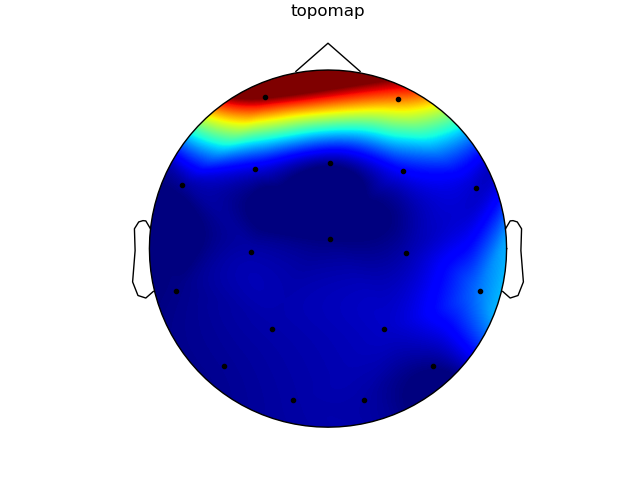

In [4]:
# Código para visualizar una imagen desde un URL.
from IPython.display import Image
i = Image(filename='topoplot.png')
i

### Objeto

guarda un objecto .ply. Por defecto topoplot.ply

In [2]:
import argparse
from topoplot import edf_topoplot

#PARSE
parser = argparse.ArgumentParser()
parser.add_argument('-i','--archive', 
	help='nombre del archivo .edf que se desea utilizar')
parser.add_argument('-o','--figure', 
	help='ingresa la direccion para guardar el topoplot')
parser.add_argument('-c','--config',
	help='nombre del archivo de configuracion. NOTA: el nombre de la variable de las coordenadas debe ser elec y de la variable de las etiquetas labels ')
parser.add_argument('-f','--formatt', 
	help='indica cual es el formato de salida del topoplot,puede ser, image, object, data')
parsedargs = parser.parse_args()
archi = parsedargs.archive
output = parsedargs.figure
config  = parsedargs.config
formatt = parsedargs.formatt
if archi is None:		archi= 'sujeto_base.edf'
if output is None:		output = 'topoplot'
if config is None:		config = 'config'
if formatt is None:		formatt = 'image'

ob = edf_topoplot()

# da lectura al edf
signal,nch,labels = ob.read_edf(archi)

# calculo de la potencia de la senal
power = ob.power(signal)

# prepara las etiquetas y coordenadas del modelo de referencia del archivo config
elec,labels_ref,center,radius = ob.prepare(config)

# calculo de las posiciones de los electrodos de la medida
pos,power,labels= ob.positions(nch,labels,elec,labels_ref,power)

if formatt == 'object':
	# interpolacion con los electrodos de referencia
	power_interp = ob.interpolation_object(power,pos,elec)
	# elaboracion del borde circular por medio de nodos 
	elec_circle = ob.circle(elec,center,radius)
	# interpolacion con los nodos del borde
	power_interp = ob.interpolation_object(power_interp,elec,elec_circle)
	# elaboracion de malla y faces
	faces = ob.mesh(elec_circle)
	# jet to RGB
	powerRGB = ob.RGB(power_interp)
	# escritura del archivo .ply
	file = ob.write_ply(output,elec_circle,faces,powerRGB)
    
    


#### Ejemplo desde la consola

python main_topo.py -i sujeto_base.edf -f object

### Data

guarda el array de las potencias en cada nodo en .npy. Por defecto topoplot.npy

In [ ]:
import argparse
from topoplot import edf_topoplot

#PARSE
parser = argparse.ArgumentParser()
parser.add_argument('-i','--archive', 
	help='nombre del archivo .edf que se desea utilizar')
parser.add_argument('-o','--figure', 
	help='ingresa la direccion para guardar el topoplot')
parser.add_argument('-c','--config',
	help='nombre del archivo de configuracion. NOTA: el nombre de la variable de las coordenadas debe ser elec y de la variable de las etiquetas labels ')
parser.add_argument('-f','--formatt', 
	help='indica cual es el formato de salida del topoplot,puede ser, image, object, data')
parsedargs = parser.parse_args()
archi = parsedargs.archive
output = parsedargs.figure
config  = parsedargs.config
formatt = parsedargs.formatt
if archi is None:		archi= 'sujeto_base.edf'
if output is None:		output = 'topoplot'
if config is None:		config = 'config'
if formatt is None:		formatt = 'image'

ob = edf_topoplot()

# da lectura al edf
signal,nch,labels = ob.read_edf(archi)

# calculo de la potencia de la senal
power = ob.power(signal)

# prepara las etiquetas y coordenadas del modelo de referencia del archivo config
elec,labels_ref,center,radius = ob.prepare(config)

# calculo de las posiciones de los electrodos de la medida
pos,power,labels= ob.positions(nch,labels,elec,labels_ref,power)

if formatt == 'data':
	import numpy as np
	import matplotlib.pyplot as plt
	pos[:,1] = pos[:,1] - center[1]
	center = [0,0]
	x = np.linspace(-0.33,0.33,500)
	y = np.linspace(-0.33,0.33,500)

	power_interp = ob.interpolation_data(power,pos)
	power_interp = ob.turnoff(power_interp,center,radius)
	im = plt.pcolormesh(x,y,power_interp, 
		vmin=np.min(power),vmax=np.max(power),cmap = 'jet')
	plt.scatter(pos[:,0],pos[:,1],c = 'k')
	plt.colorbar(im)
	np.save(output,power_interp)
	plt.show()

#### Ejemplo desde la consola

 python main_topo.py -i sujeto_base.edf -f data

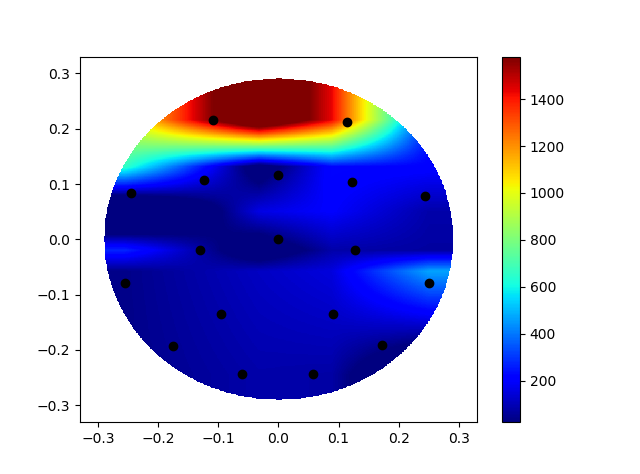

In [6]:
# Código para visualizar una imagen desde un URL.
from IPython.display import Image
i = Image(filename='topoplot_data.png')
i

## Bibliotecas utilizadas

[1] MNE        http://www.martinos.org/mne/

[2] pyedflib   http://pyedflib.readthedocs.io

[3] Numpy      http://www.numpy.org/

[4] Argparse   https://docs.python.org/3/library/argparse.html

[5] Scipy      http://www.scipy.org

[6] Matplotlib http://www.matplotlib.org